In [1]:
import random
import itertools
import networkx as nx

from itertools import combinations

In [37]:
vertices = list(range(1, 101))
edges = random.sample(list(combinations(vertices, 2)), 200)

In [38]:
G = nx.Graph()
G.add_edges_from(edges)

In [39]:
print(f'Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}')

Nodes: 100, Edges: 200


In [40]:
adjacency_list = [(n, nbrdict) for n, nbrdict in G.adjacency()]
adjacency_matrix = nx.to_numpy_matrix(G, nodelist=vertices)

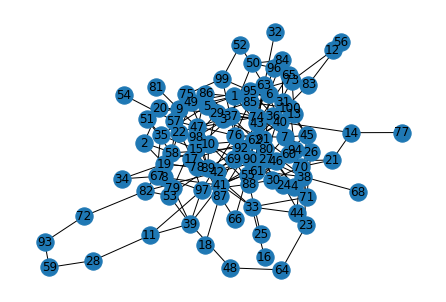

In [41]:
nx.draw(G, with_labels=True)

In [42]:
adjacency_list[0]

(76, {1: {}, 7: {}, 24: {}, 57: {}, 69: {}, 85: {}, 91: {}, 97: {}, 99: {}})

In [44]:
adjacency_matrix[75]

matrix([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         1., 0., 1., 0.]])

In [45]:
adjacency_list[1]

(91, {3: {}, 70: {}, 76: {}, 92: {}})

In [46]:
adjacency_matrix[90]

matrix([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.]])

In [47]:
adjacency_list[2]

(33, {16: {}, 44: {}, 71: {}, 78: {}, 89: {}})

In [48]:
adjacency_matrix[32]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]])

In [32]:
def find_connected_components(graph):
    visited = []
    connected_components = []
    for node in graph.nodes:
        if node not in visited:
            cc = [] #connected component
            visited, cc = dfs_traversal(graph, node, visited, cc)
            connected_components.append(cc)
    return connected_components

def dfs_traversal(graph, start, visited, path):
    if start in visited:
        return visited, path
    visited.append(start)
    path.append(start)
    for node in graph.neighbors(start):
        visited, path = dfs_traversal(graph, node, visited, path)
    return visited, path

In [ ]:
connected_components = find_connected_components(G)
print("Total number of connected components =", len(connected_components))

In [64]:
len(connected_components[0])

100

In [51]:
adjacency_dict = {}
for node in adjacency_list:
    adjacency_dict.update({node[0]: sorted(list(node[1].keys()))})

In [52]:
def BFS_shortest_path(graph, start, goal):
    explored = []
    queue = [[start]]

    if start == goal:
        return print('Same Node')

    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                if neighbour == goal:
                    print("Shortest path = ", *new_path)
                    return
            explored.append(node)

    print("So sorry, but a connecting"\
                "path doesn't exist :(")
    return

In [53]:
BFS_shortest_path(adjacency_dict, 1, 13)

Shortest path =  1 73 13


In [54]:
all_paths = list(nx.all_simple_paths(G, source=1, target=13, cutoff=3))

In [55]:
all_paths

[[1, 73, 13]]

In [56]:
BFS_shortest_path(adjacency_dict, 35, 29)

Shortest path =  35 5 74 40 29


In [61]:
all_paths = list(nx.all_simple_paths(G, source=35, target=29, cutoff=4))

In [62]:
all_paths

[[35, 67, 79, 98, 29],
 [35, 5, 74, 40, 29],
 [35, 5, 86, 98, 29],
 [35, 15, 47, 98, 29],
 [35, 15, 37, 98, 29]]